In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
data = pd.read_csv("data/housing.csv")

## Dropping null rows

In [3]:
data.dropna(inplace=True)

## Spliting the dataset into training and testing

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
train_data = X_train.join(y_train)

In [7]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16609,-120.47,35.74,9.0,4267.0,785.0,2065.0,691.0,3.7303,<1H OCEAN,162700.0
9279,-122.60,38.11,23.0,8642.0,1294.0,3594.0,1253.0,5.3962,<1H OCEAN,301500.0
6524,-118.04,34.06,30.0,2019.0,551.0,2481.0,484.0,3.1875,<1H OCEAN,154200.0
3100,-117.69,35.65,5.0,1131.0,276.0,520.0,232.0,4.0167,INLAND,87500.0
2622,-124.10,40.95,17.0,1485.0,345.0,823.0,316.0,1.8993,NEAR OCEAN,78400.0
...,...,...,...,...,...,...,...,...,...,...
16809,-122.41,37.66,44.0,431.0,195.0,682.0,212.0,3.2833,NEAR OCEAN,233300.0
11427,-117.99,33.69,17.0,3386.0,729.0,1715.0,666.0,3.7479,<1H OCEAN,213000.0
9262,-120.04,36.96,23.0,2126.0,506.0,2091.0,491.0,1.3713,INLAND,51800.0
5251,-118.46,34.08,35.0,3247.0,525.0,1065.0,484.0,7.8426,<1H OCEAN,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

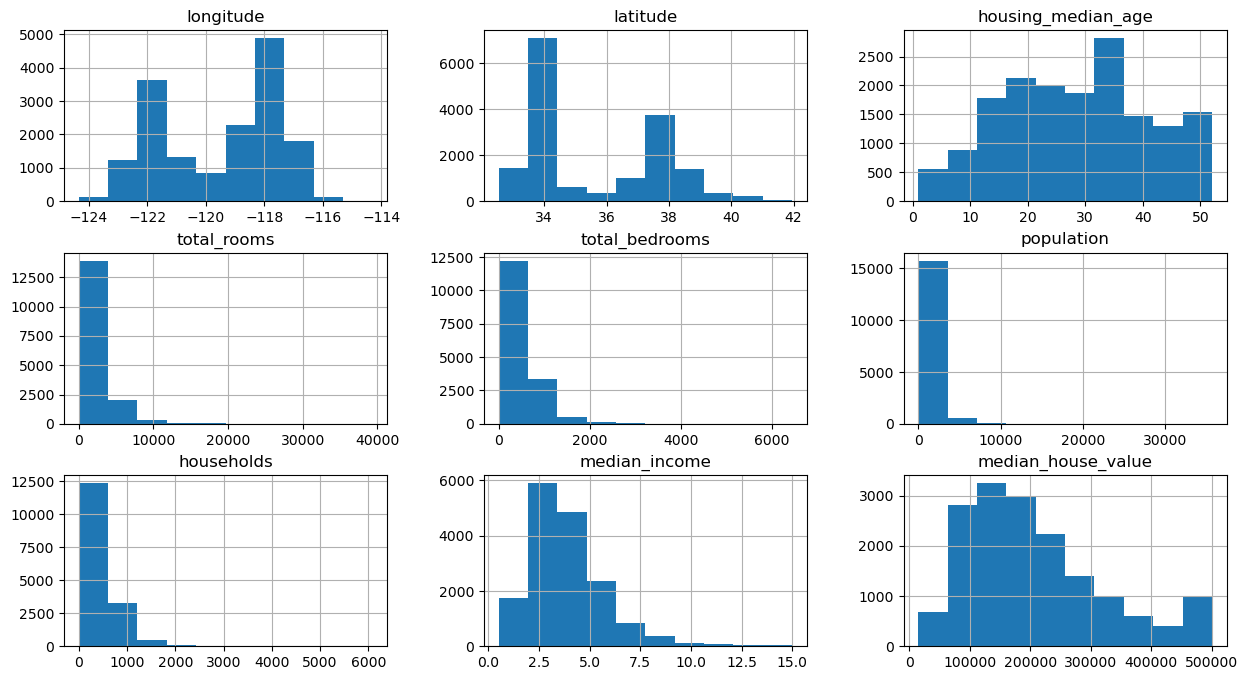

In [8]:
train_data.hist(figsize=(15,8))

<Axes: >

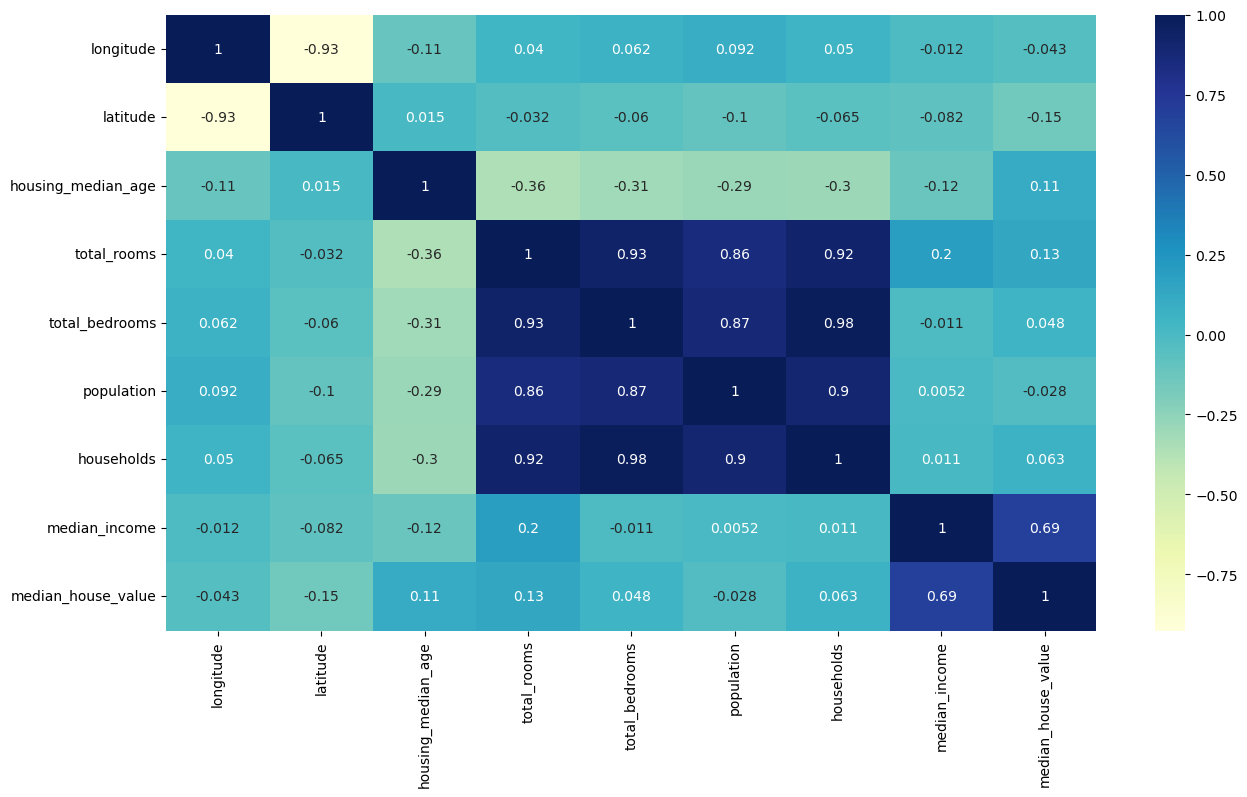

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

## Data preprocessing

In [10]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

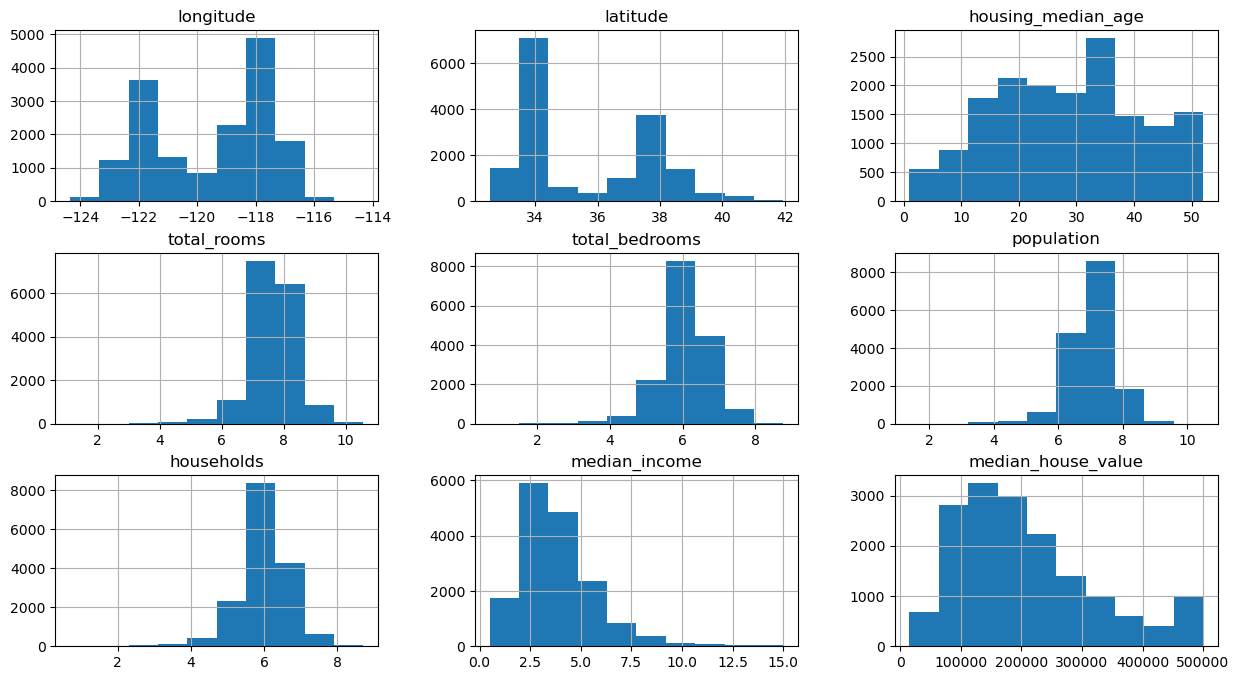

In [11]:
train_data.hist(figsize=(15,8))

In [12]:
train_data = train_data.join(pd.get_dummies(train_data["ocean_proximity"], dtype=int)).drop(["ocean_proximity"], axis=1)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16609,-120.47,35.74,9.0,8.358901,6.666957,7.633370,6.539586,3.7303,162700.0,1,0,0,0,0
9279,-122.60,38.11,23.0,9.064505,7.166266,8.187299,7.134094,5.3962,301500.0,1,0,0,0,0
6524,-118.04,34.06,30.0,7.610853,6.313548,7.816820,6.184149,3.1875,154200.0,1,0,0,0,0
3100,-117.69,35.65,5.0,7.031741,5.624018,6.255750,5.451038,4.0167,87500.0,0,1,0,0,0
2622,-124.10,40.95,17.0,7.303843,5.846439,6.714171,5.758902,1.8993,78400.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,-122.41,37.66,44.0,6.068426,5.278115,6.526495,5.361292,3.2833,233300.0,0,0,0,0,1
11427,-117.99,33.69,17.0,8.127700,6.593045,7.447751,6.502790,3.7479,213000.0,1,0,0,0,0
9262,-120.04,36.96,23.0,7.662468,6.228511,7.645876,6.198479,1.3713,51800.0,0,1,0,0,0
5251,-118.46,34.08,35.0,8.085795,6.265301,6.971669,6.184149,7.8426,500001.0,1,0,0,0,0


<Axes: >

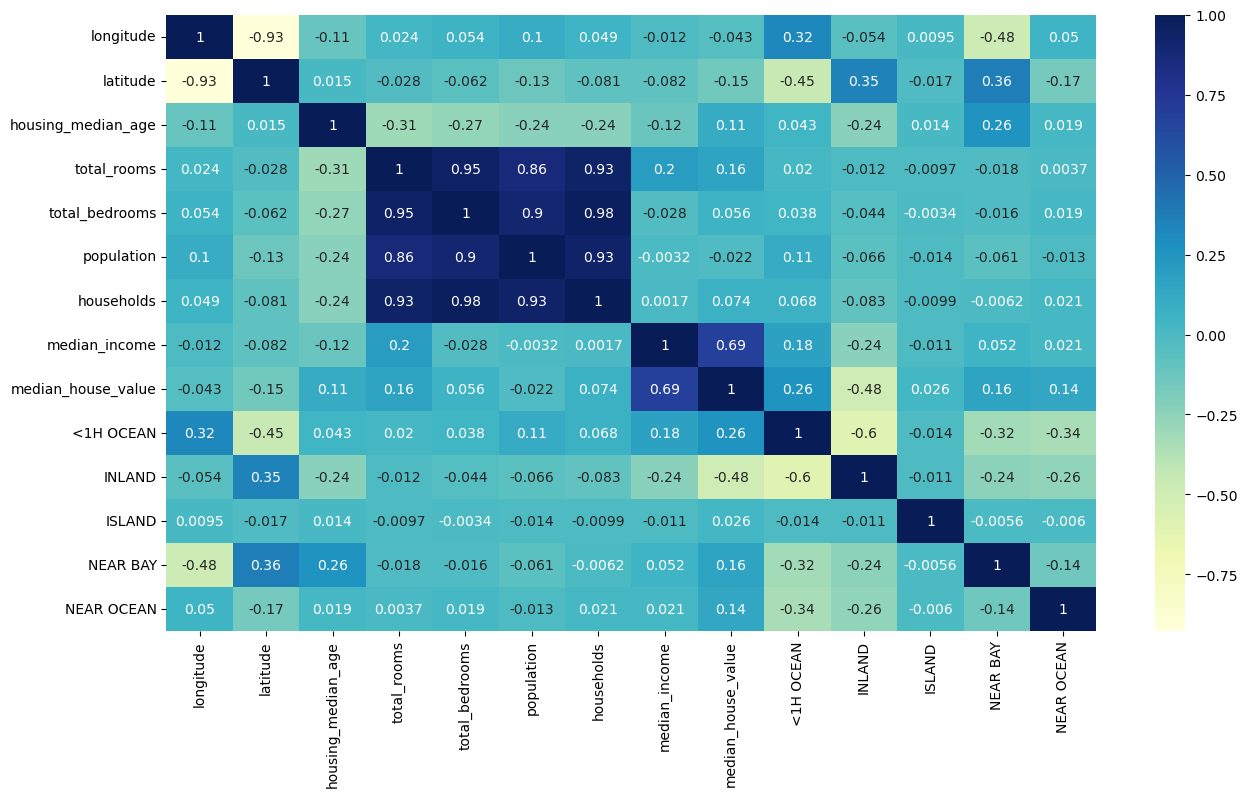

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

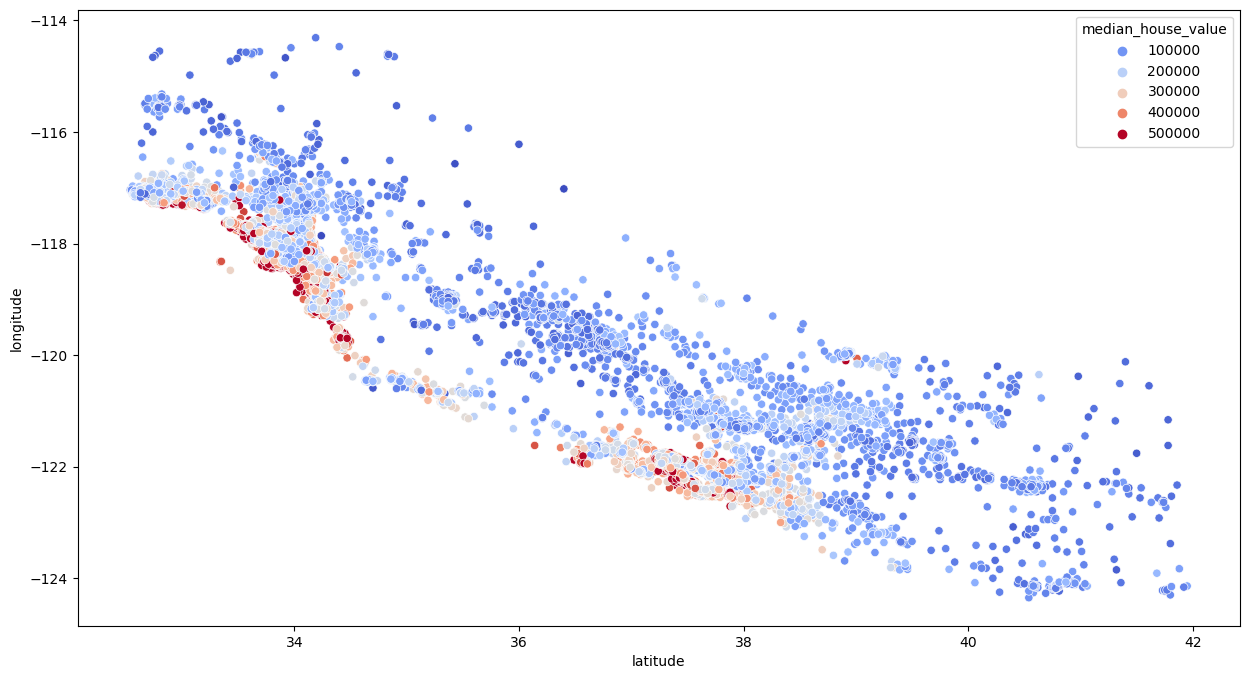

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [16]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

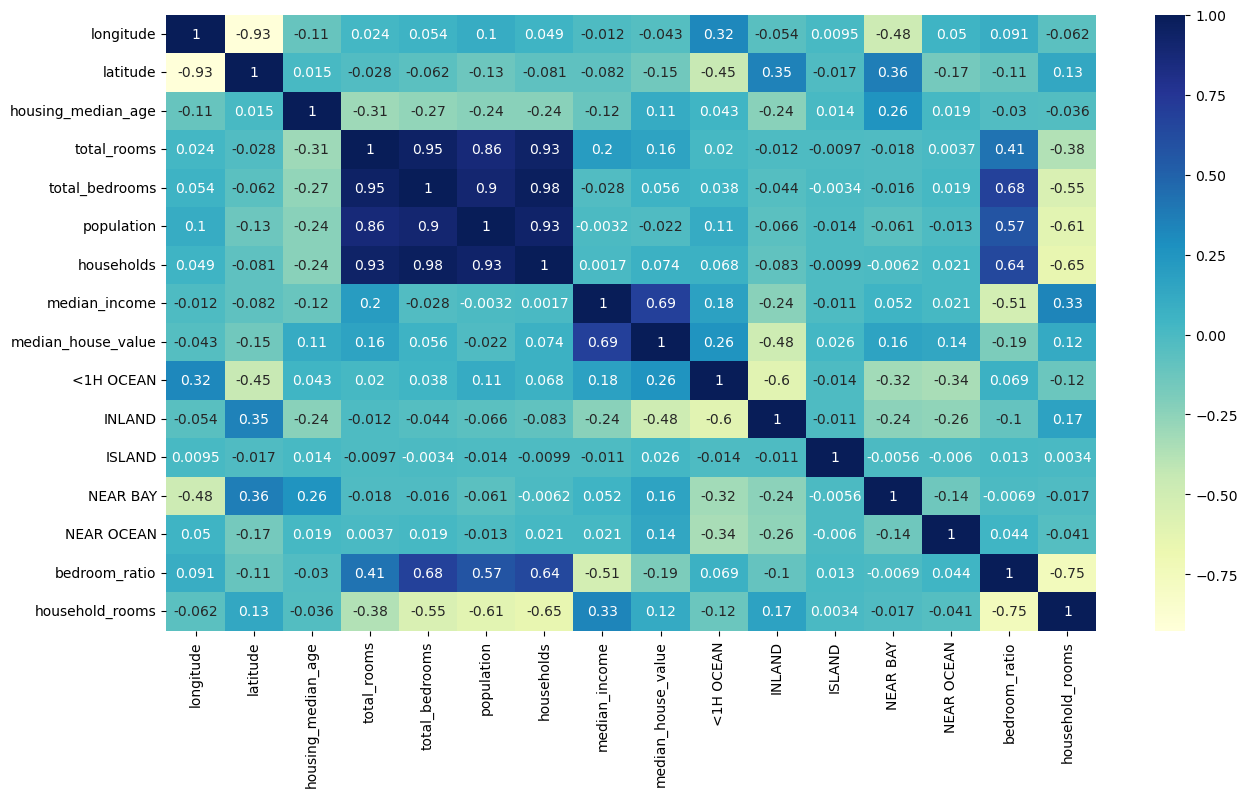

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Simple Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(columns=["median_house_value"]), train_data["median_house_value"]
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [19]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data["ocean_proximity"], dtype=int)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]


In [20]:
X_test, y_test = test_data.drop(columns=["median_house_value"]), test_data["median_house_value"]

In [21]:
X_test_s = scaler.transform(X_test)

In [22]:
reg.score(X_test_s, y_test)

0.6768849166432889

## Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [24]:
forest.score(X_test_s, y_test)

0.8243765024929808

In [25]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100,200,300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
best_forest = grid_search.best_estimator_

In [74]:
best_forest.score(X_test_s, y_test)

0.5644525221622436